# Tabacco

The survey asked questions about different Tabacco products as shown in the list below. To help in the analysis, the data set is divided to extract the sub-classes data. 

* Cigarettes
* Snuff
* Cigar

NOTE: Data got filtered from values that are either 'Bad Data', 'Refused', 'Don't Know', 'Blank' or 'Legitimate Skip'.

In [34]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [35]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [36]:
case_quest_data = dataset.ix[:,0:2].copy()
tabacco = dataset.ix[:,'CIGEVER':'PIPE30DY'].copy() # tabacco dataset

In [37]:
tabacco_cig = tabacco.ix[:,'CIGEVER':'CIG100LF'].copy() # cigarettes dataset
tabacco_snuff = tabacco.ix[:,'SNFEVER':'SNF30BR2'].copy() # snuff dataset
tabacco_cigar = tabacco.ix[:,'CIGAREVR':'CGR30BR2'].copy() # cigar dataset

## Cigarettes

* How many cases use the drug?

As can be seen below, almost half of the cases have never smoken cigarettes while the other half smoked cigrates.

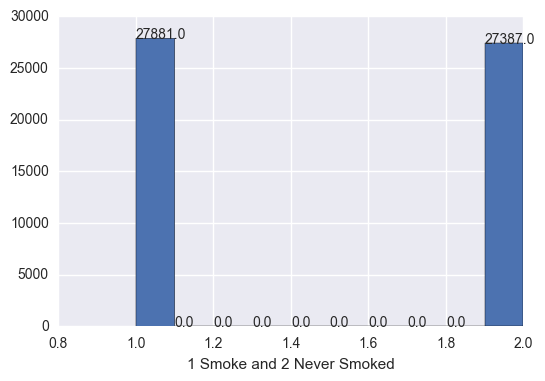

In [38]:
ax = tabacco_cig['CIGEVER'].hist()
plt.xlabel('1 Smoke and 2 Never Smoked')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

To help with the analysis, ages were divided into 7 different age ranges. The overall age range is from 1 years old to 68 years old.

After the analysis using the strip plot and the count plot, it shows that those of age range from 10-20 usually tend to start trying smoking a cigarette more than any other age ranges. We can also infer that ages from 10 to 30 tend to smoke everyday.

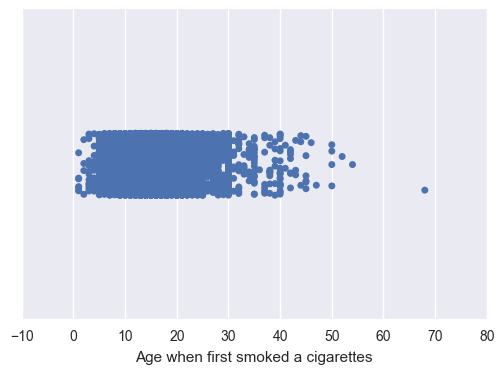

In [39]:
# data set filtered for age data for trying
age_data_1 = tabacco_cig.ix[(tabacco_cig['CIGEVER'] == 1) & (tabacco_cig['CIGTRY'] != 985) & (tabacco_cig['CIGTRY'] != 991) & (tabacco_cig['CIGTRY'] != 997) & (tabacco_cig['CIGTRY'] != 994)].copy()
sns.stripplot(x=age_data_1['CIGTRY'], jitter=1)
plt.xlabel('Age when first smoked a cigarettes')

In [40]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

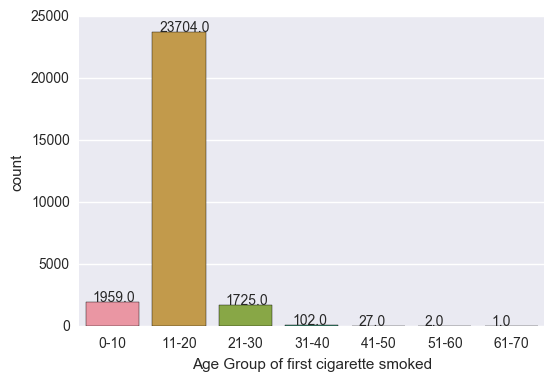

In [41]:
# to get count by age range
age_data_1['AgeGroup'] = age_data_1[['CIGTRY']].apply(cutDF)
ax = sns.countplot(x=age_data_1['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of first cigarette smoked')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

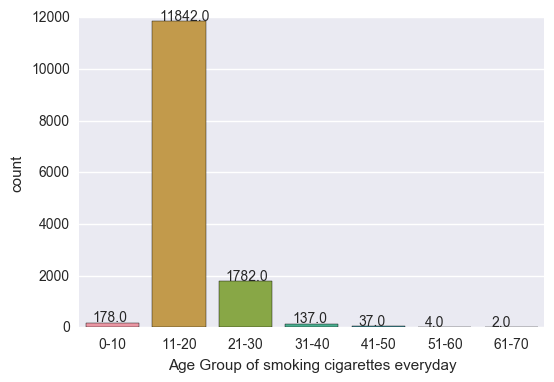

In [42]:
# count of age range for those who smoke
age_data_E = tabacco_cig.ix[(tabacco_cig['CIGEVER'] == 1) & (tabacco_cig['CIGAGE'] != 985) & (tabacco_cig['CIGAGE'] != 991) & (tabacco_cig['CIGAGE'] != 997) & (tabacco_cig['CIGAGE'] != 994) & (tabacco_cig['CIGAGE'] != 998) & (tabacco_cig['CIGAGE'] != 999)].copy()
age_data_E['AgeGroup'] = age_data_E[['CIGAGE']].apply(cutDF)
ax = sns.countplot(x=age_data_E['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of smoking cigarettes everyday')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

Most of the cases who ever smoked a cigarette did not smoke one during the past 30 days since the survey was conducted in 2012. However, specific date of the survey was not mentioned. It could be concluded also from the above analysis that almost half of those cases who ever smoked a cigarette just tried it while the other half continued smoking. 

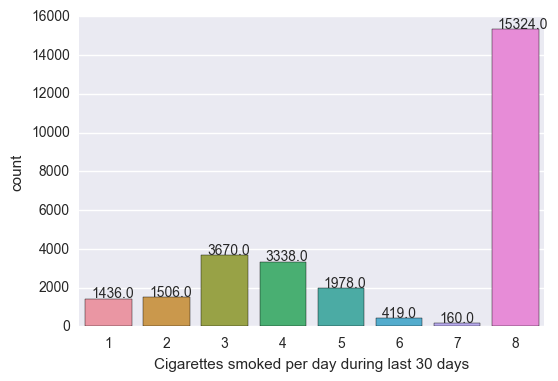

In [43]:
# filter number of cigarettes smoked per day
numCigDay = tabacco_cig.ix[(tabacco_cig['CIGEVER'] == 1) & (tabacco_cig['CIG30AV'] != 91) & (tabacco_cig['CIG30AV'] != 991) & (tabacco_cig['CIG30AV'] != 94) & (tabacco_cig['CIG30AV'] != 97) & (tabacco_cig['CIG30AV'] != 98)].copy()
numCigDay['CIG30AV'] = numCigDay.ix[:,'CIG30AV'].replace(to_replace=93, value=8)
ax = sns.countplot(x=numCigDay['CIG30AV'])
plt.xlabel('Cigarettes smoked per day during last 30 days')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

For those who continued smoking, most smoke 2 to 5 cigarettes per day or 6 to 15 cigarettes per day while not many cases smoke more than 2 packs per day. Also in the below plot, correlation between the the age of those cases who continued smoking everyday and how many cigarettes they smoke per day is shown with categorical classification of what type of cigarettes they smoke: 1 = Light, 2 = Ultra Light, 3 = Medium, 4 = Full Flavor. It shows that ages from 10 to 30 tends to smoke Full Flavor cigarettes while older ages tends to smoke Light cigarettes. 

1 = Less than one cigarette per day <br/>
2 = 1 cigarette per day <br/>
3 = 2 to 5 cigarettes per day <br/>
4 = 6 to 15 cigarettes per day (about 1/2 pack) <br/>
5 = 16 to 25 cigarettes per day (about 1 pack) <br/>
6 = 26 to 35 cigarettes per day (about 1 1/2 packs) <br/>
7 = More than 35 cigs per day (abt 2 packs or more) <br/>
8 = Did not use cigarattes in the past 30 days <br/>

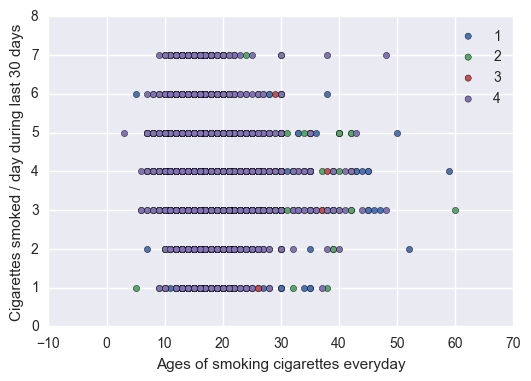

In [44]:
# relation between age for those who smoke everyday, how many cigarettes they smoke per day and categorized by the type of cigarette

#create a color palette
colors = sns.color_palette()
joint = tabacco_cig.ix[(tabacco_cig['CIGEVER'] == 1) & (tabacco_cig['CIG30AV'] != 91) & (tabacco_cig['CIG30AV'] != 93) & (tabacco_cig['CIG30AV'] != 94) & (tabacco_cig['CIG30AV'] != 97) & (tabacco_cig['CIG30AV'] != 98) & (tabacco_cig['CIGAGE'] != 985) & (tabacco_cig['CIGAGE'] != 991) & (tabacco_cig['CIGAGE'] != 997) & (tabacco_cig['CIGAGE'] != 994) & (tabacco_cig['CIGAGE'] != 998) & (tabacco_cig['CIGAGE'] != 999) & (tabacco_cig['CIG30TPE'] != 91) & (tabacco_cig['CIG30TPE'] != 93) & (tabacco_cig['CIG30TPE'] != 94) & (tabacco_cig['CIG30TPE'] != 97) & (tabacco_cig['CIG30TPE'] != 98)].copy()

#for each group create an own plot and overlay them
for (name, group),color in zip(joint.groupby('CIG30TPE'),colors):
    plt.scatter(x=group['CIGAGE'],y=group['CIG30AV'], label=name, c=color)
    
plt.xlabel('Ages of smoking cigarettes everyday')
plt.ylabel('Cigarettes smoked / day during last 30 days')
plt.legend()

In [45]:
#sns.jointplot(x=joint['CIGAGE'],y=joint['CIG30TPE']).set_axis_labels("Ages of smoking cigarettes everyday", "Cigarettes smoked / day during last 30 days");

* Did they stop and go back to it? Are they planning to quit?

As mentioned before, half of the cases just tried smoking a cigarette once. However for those who continued smoking cigarettes everyday, most of them smoked a cigarette withing the past 30 days. It seems that ages older than 60 tend to quit smoking as the last cigarette they smoked was more than 3 years ago. Ages from 50-60 though tend to continue smoking.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago but within the past 3 yrs <br/>
4 = More than 3 years ago <br/>

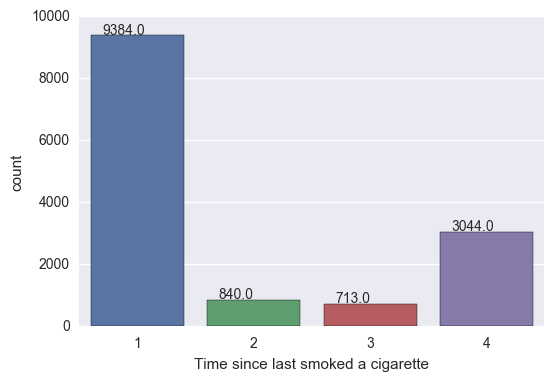

In [46]:
# Last time smoked a cigarette
lastCig = tabacco_cig.ix[(tabacco_cig['CIGEVER'] == 1) & (tabacco_cig['CIGREC'] < 5) & (tabacco_cig['CIGAGE'] != 985) & (tabacco_cig['CIGAGE'] != 991) & (tabacco_cig['CIGAGE'] != 997) & (tabacco_cig['CIGAGE'] != 994) & (tabacco_cig['CIGAGE'] != 998) & (tabacco_cig['CIGAGE'] != 999)].copy()
ax = sns.countplot(x=lastCig['CIGREC'])
plt.xlabel('Time since last smoked a cigarette')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

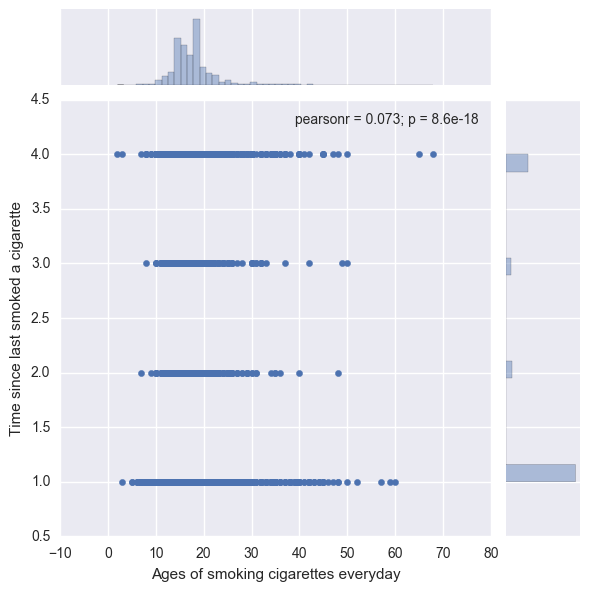

In [47]:
# relation between age and last time they smoked a cigarette
sns.jointplot(x=lastCig['CIGAGE'],y=lastCig['CIGREC']).set_axis_labels("Ages of smoking cigarettes everyday", "Time since last smoked a cigarette");

## Snuff

* How many cases use the drug?

As can be seen below, not many cases ever tried snuffing tabacco. 

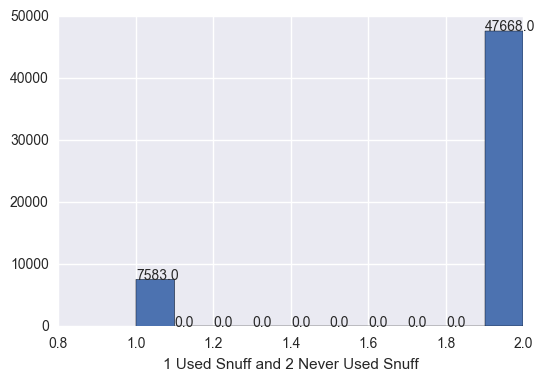

In [48]:
# extract how many ever snuffed tabacco
everSnuffed = tabacco_snuff.ix[(tabacco_snuff['SNFEVER'] != 94) & (tabacco_snuff['SNFEVER'] != 97)].copy()
ax = everSnuffed['SNFEVER'].hist()
plt.xlabel('1 Used Snuff and 2 Never Used Snuff')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

Similar to cigarettes smoking, age ranging from 10 to 20 tend to try snuffing tabacco than any other age ranges. Also not so many older people, age ranging from 40 to 60 try it. Very old cases never tried it.

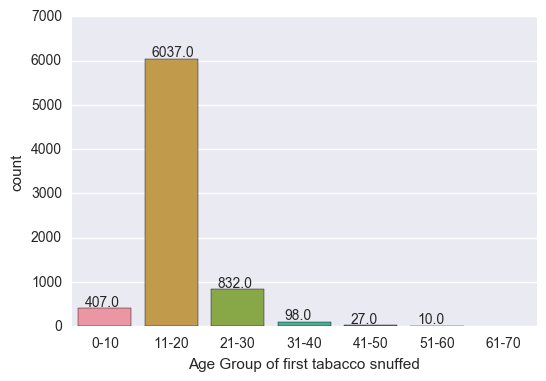

In [49]:
# extract the age range of those who ever snuffed tobacco
age_data = everSnuffed.ix[(everSnuffed['SNUFTRY'] < 80)].copy()
age_data['AgeGroup'] = age_data[['SNUFTRY']].apply(cutDF)
ax = sns.countplot(x=age_data['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of first tabacco snuffed')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

More than 5000 cases did not use snuff for the last 30 days since the survey was conducted. From this, we can conclude that they quit using snuff. For those who used snuff within the last 30 days, most of them used it everyday as can be seen in the histogram below which is almost, but not quite, 1000 cases. The majority of the cases after using it everyday used it only one day.

Age ranging from 1 to 10 tend to use snuff every day. However, older ages (40 and older), even though not much, tends to snuff more than one day but not every day in the last 30 days.

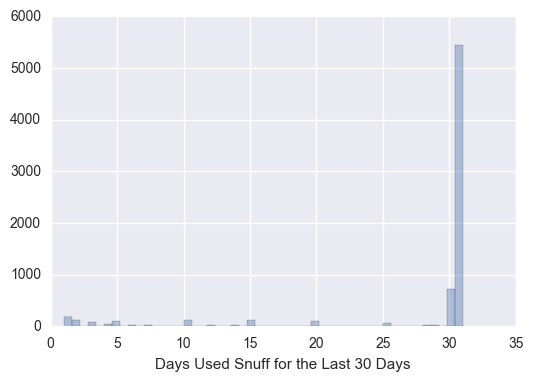

In [50]:
# how many days used snuff for the last 30 days
howMany = age_data.ix[(age_data['SNF30USE'] < 31) | (age_data['SNF30USE'] == 93)].copy()
howMany['SNF30USE'] = howMany.ix[:,'SNF30USE'].replace(to_replace=93, value=31)
sns.distplot(howMany['SNF30USE'],kde=False)
plt.xlabel('Days Used Snuff for the Last 30 Days')

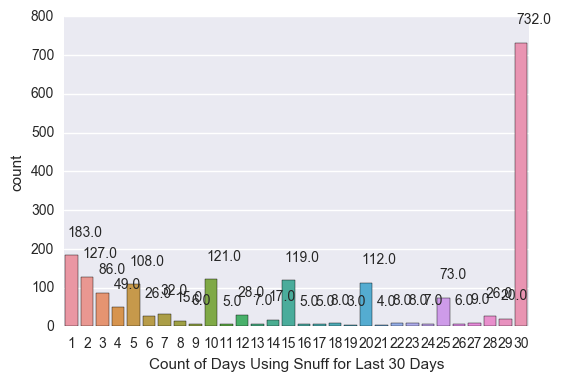

In [51]:
ax = sns.countplot(x=age_data.ix[(age_data['SNF30USE'] < 31)].copy()['SNF30USE'])
plt.xlabel('Count of Days Using Snuff for Last 30 Days')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

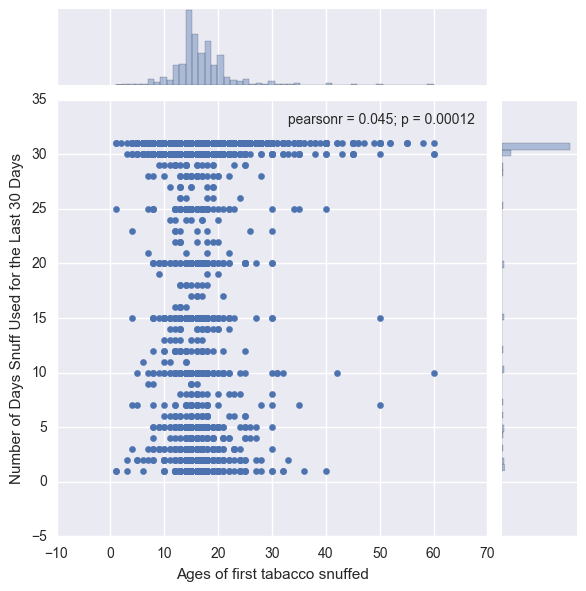

In [52]:
sns.jointplot(x=howMany['SNUFTRY'],y=howMany['SNF30USE']).set_axis_labels("Ages of first tabacco snuffed", "Number of Days Snuff Used for the Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

Most of the cases as shown below did not snuff tabacoo for almost more than 3 years. However, some still do snuff tobacco. Ages 40 and older tend to stop snuffing tabacco more than other ages.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago but within the past 3 yrs <br/>
4 = More than 3 years ago <br/>

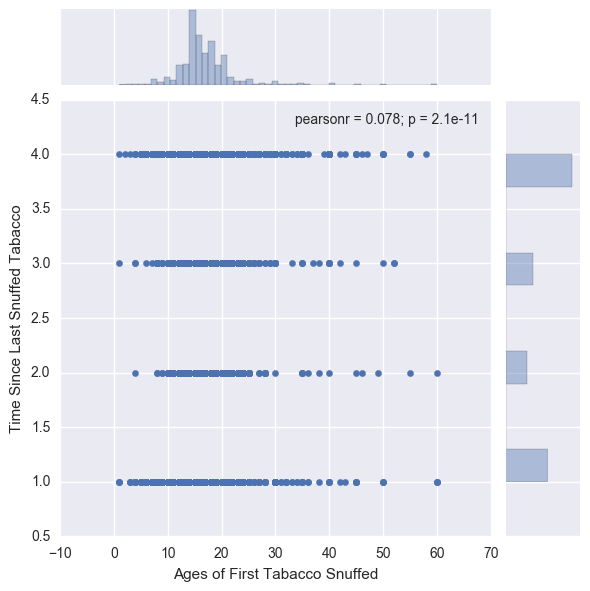

In [53]:
lastUsed = age_data.ix[(everSnuffed['SNFREC'] < 5)].copy()
sns.jointplot(x=lastUsed['SNUFTRY'],y=lastUsed['SNFREC']).set_axis_labels("Ages of First Tabacco Snuffed", "Time Since Last Snuffed Tabacco");

## Cigar

* How many cases use the drug?

More cases smoked cigar compared to tabacco snuffing. However still not so many cases ever smoked a cigar.


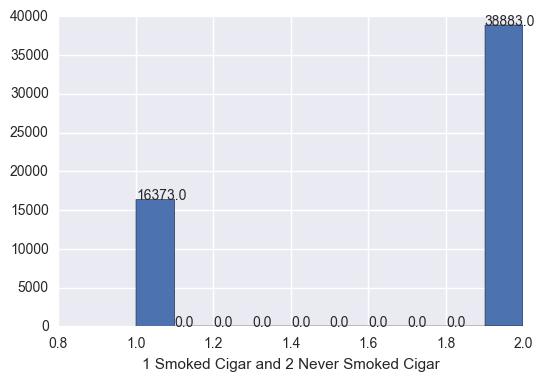

In [54]:
# extract how many ever smoked cigar
everCigar = tabacco_cigar.ix[(tabacco_cigar['CIGAREVR'] != 94) & (tabacco_cigar['CIGAREVR'] != 97)].copy()
ax = everCigar['CIGAREVR'].hist()
plt.xlabel('1 Smoked Cigar and 2 Never Smoked Cigar')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

Similar to tabacco snuffing and the cigarettes smoking, age ranging from 11-20 tend to try cigar smoking than any other age range.

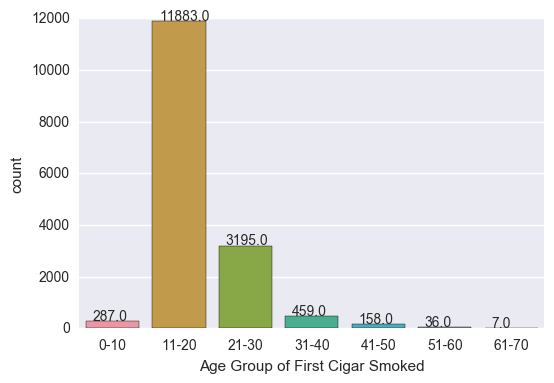

In [55]:
# extract the age range of those who ever smoked cigar
age_data_cigar = everCigar.ix[(everCigar['CIGARTRY'] < 80)].copy()
age_data_cigar['AgeGroup'] = age_data_cigar[['CIGARTRY']].apply(cutDF)
ax = sns.countplot(x=age_data_cigar['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of First Cigar Smoked')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

After filtering the data, it shows that almost all cases did not smoke cigar during the 30 days before the survey was conducted. It seems that those cases that smoked however are ages from 10 to 25 years in which the major smoked cigar 1 to 2 days.

1 = 1 to 2 Days <br/>
2 = 3 to 5 Days <br/>
3 = 6 to 9 Days <br/>
4 = 10 to 19 Days <br/>
6 = All 30 Days <br/>
7 = Did Not Use Cigars in the Past 30 Days <br/>

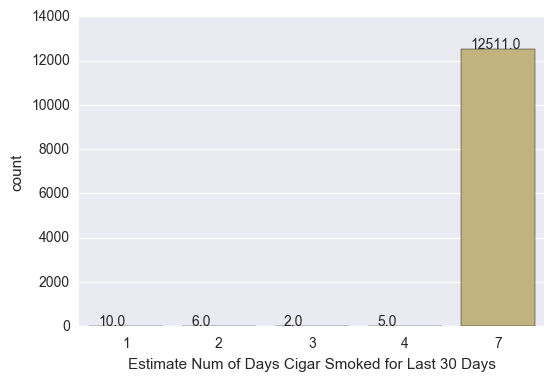

In [56]:
# estimate of number of days smoked cigar for the last 30 days
estHowMany = age_data_cigar.ix[(age_data_cigar['CI30EST'] < 7) | (age_data_cigar['CI30EST'] == 93)].copy()
estHowMany['CI30EST'] = estHowMany.ix[:,'CI30EST'].replace(to_replace=93, value=7)
ax = sns.countplot(estHowMany['CI30EST'])
plt.xlabel('Estimate Num of Days Cigar Smoked for Last 30 Days')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

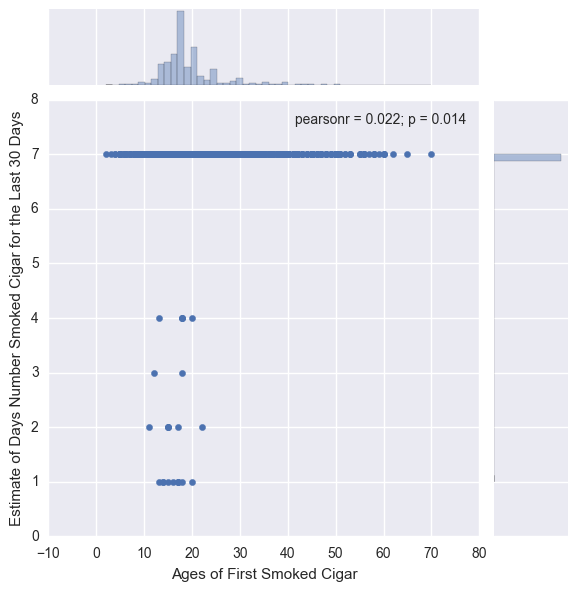

In [57]:
sns.jointplot(x=estHowMany['CIGARTRY'],y=estHowMany['CI30EST']).set_axis_labels("Ages of First Smoked Cigar", "Estimate of Days Number Smoked Cigar for the Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

Contradicting to the above information, here it shows that high number of cases last smoked a cigar within the last 30 days from which the survey was conducted. 

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago but within the past 3 yrs <br/>
4 = More than 3 years ago <br/>

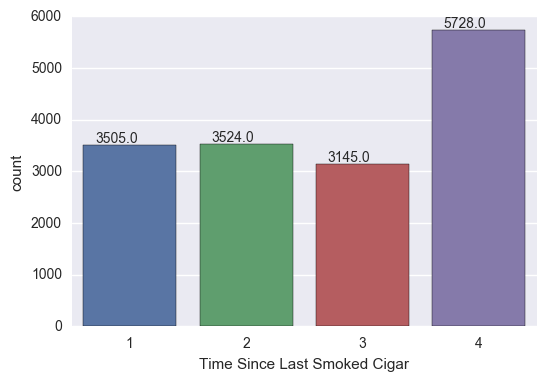

In [58]:
lastUsed_cigar = age_data_cigar.ix[(age_data_cigar['CIGARREC'] < 5)].copy()
ax = sns.countplot(lastUsed_cigar['CIGARREC'])
plt.xlabel('Time Since Last Smoked Cigar')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

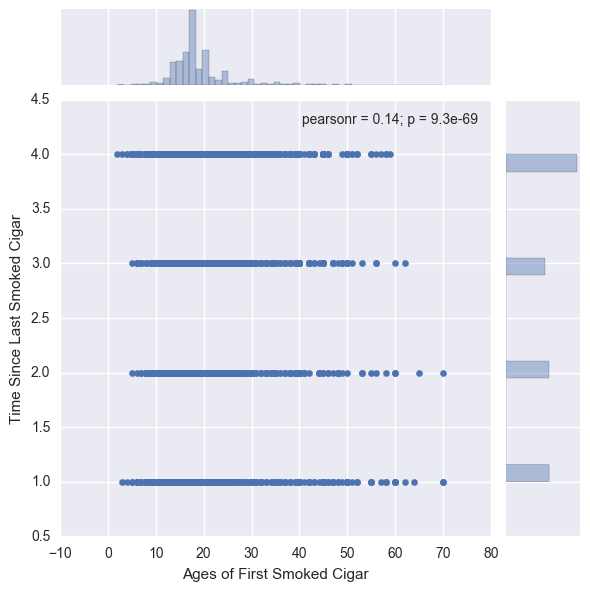

In [59]:
sns.jointplot(x=lastUsed_cigar['CIGARTRY'],y=lastUsed_cigar['CIGARREC']).set_axis_labels("Ages of First Smoked Cigar", "Time Since Last Smoked Cigar");

## Correlation

* almost all of the cases who ever tried snuffing tabacco also tried smoking cigarettes 

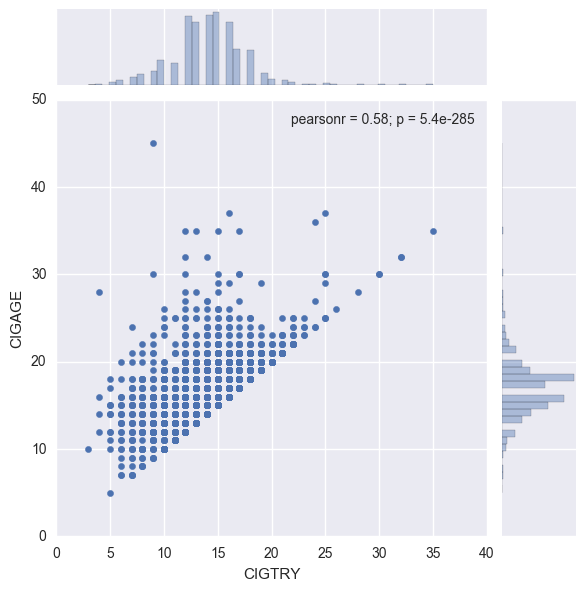

In [60]:
tabacco_all_ages = tabacco.ix[(tabacco['CIGEVER'] == 1) & (tabacco['SNFEVER'] == 1) & (tabacco['CIGAREVR'] == 1) & (tabacco['SNUFTRY'] < 80) & (tabacco['CIGTRY'] < 80) & (tabacco['CIGAGE'] < 80) & (tabacco['CIGARTRY'] < 80), ['CIGTRY', 'CIGAGE', 'SNUFTRY', 'CIGARTRY']].copy()
sns.jointplot(x=tabacco_all_ages['CIGTRY'],y=tabacco_all_ages['CIGAGE'])

In [61]:
tabacco_all_ages

,CIGTRY,CIGAGE,SNUFTRY,CIGARTRY
22,10,13,18,15
42,16,16,19,16
44,12,18,18,21
75,18,19,21,25
135,16,16,32,25
146,17,17,19,19
187,12,15,16,18
189,17,20,17,18
195,9,14,15,16
220,12,15,14,13


## Next

[Alcohol](Alcohol.ipynb)